# Math 5031 Homework 5

Due Monday, October 19



### MingxuanJiang

Collarborated with HaoChen, JingyiLi and HanlinDing

### 1.  Mortgage Backed Securities (MBS) are a very important kind of security. In this exercise, we will look at some imortant aspects of these securities.  

Consider a pool of identical mortgages with 

$L_0  = 100,000,000$ (in total)

$i = .06$  
$r_{12} = \frac{i}{12}$

N  = 360

a.  Calculate the initial monthly loanpayment for the pool (assuming no pre-payments)

b.  Write a function that will input $L_0, i, N$ and the pre-pay speed $v$ expressed as percentage of $PSA$.  The output will be the monthly interest $int_m$, the scheduled monthly paydown of principal $Pay_m^{sched}$, the pre-payments $Pay_m^{pre}$, and the total cash flow $CF_m = int_m + Pay_m^{sched} + Pay_m^{pre}$


c. Mortgage pool investors are interested in the impact that interest rates can have on the value of the cash flows produced.  For the sake of this analysis, assume the yield curve is flat $r(0,t) = r$ (in general $i \neq r$) .  Using you function, make a plot of the value of the mortgage pool's cash flows assuming $v = 2$ and varying $r$ from $0.10\%$ to $10.0\%$.



d.  Hold the discount rate fixed at $r = 5\%$ and vary $v$ from $0$ to $5$. Plot this graph.




e.  It turns out, that when rates fall, pre-pays increase and when rates rise, pre-pays decrease.  Revisit your graph in c, but alter the prepayment speed $v$ to depend on $r$ via $v(r) = \frac{.12}{r+ .01}$.  What do you notice compared to the graphs in part c?   

#### a.  Calculate the initial monthly loanpayment for the pool (assuming no pre-payments)

 

$$C =  L_0 \times \frac{r_{12}}{1-\left(1+r_{12}\right)^{-N}} $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# calculate the loan payment
loanpayment = lambda L0,r12, N: L0 * r12/(1- np.power(1+r12, -N))

C1 = loanpayment(100000000,0.06/12,360)
print('The initial monthly loan payment is',C1)

The initial monthly loan payment is 599550.525152757


#### b.  Write a function that will input $L_0, i, N$ and the pre-pay speed $v$ expressed as percentage of $PSA$.  The output will be the monthly interest $int_m$, the scheduled monthly paydown of principal $Pay_m^{sched}$, the pre-payments $Pay_m^{pre}$, and the total cash flow $CF_m = int_m + Pay_m^{sched} + Pay_m^{pre}$




Pre-pay speed
$$p = 1-(1-CPR)^{(1/12)}$$
Relationships

$$int_m = r_{12} \times L_{m-1}$$

$$C_m =  L_{m-1} \times \frac{r_{12}}{1-\left(1+r_{12}\right)^{-(N-m+1)}} $$

$$ Pay_m^{sched} = C_m - int_m$$

$$Pay_m^{pre} = (L_{m-1} - Pay_m^{sched}) \times p_m$$

$$L_{m}= L_{m-1} - Pay_m^{sched} -  Pay_m^{pre}$$

In [3]:
def GetPrepayment(L0,i,N,speed):
    L = L0 * np.ones(N+1)  #L is indexed 0 to 360
    # interest
    int = np.zeros(N)       #for these variable, the index 0 means month 1
    # prepayment
    paypre = np.ones(N)
    # scheduled paydown of principal
    paysched = np.ones(N)
    rm = i/12
    CPR = np.append(np.linspace(.002,.06,30), .06* np.ones(N-30))
    p = 1 - np.power(1-speed*CPR,1/12) 
    # total cash flow
    CF = np.ones(N)
    
    for m in range(N):
        int[m] =  L[m] * rm
        C[m] = loanpayment(L[m], rm,N -m )  
        paysched[m] = C[m] - int[m]
        paypre[m] = (L[m] - paysched[m]) * p[m] 
        L[m+1] = L[m] - paysched[m] - paypre[m]
        CF[m] = int[m] + paysched[m] + paypre[m]
    return int, paysched, paypre, CF

In [4]:
# test
CPR = np.append(np.linspace(.002,.06,30), .06* np.ones(330))
# assume the prepay speed
v = 1
C = C1* np.ones(360)
N = 360
L0 = 100000000
i = 0.06
interest, paysched, paypre, CF = GetPrepayment(L0,i,N,v)


In [5]:
for i in range(len(interest)):
    print('When the month is',i,'. The monthly interest is',round(interest[i],2),'. The scheduled monthly paydown of principal is'\
          ,round(paysched[i],2),'. The pre-payments is',round(paypre[i],2),'. The total cash flow is',round(CF[i],2),'.')

When the month is 0 . The monthly interest is 500000.0 . The scheduled monthly paydown of principal is 99550.53 . The pre-payments is 16665.36 . The total cash flow is 616215.88 .
When the month is 1 . The monthly interest is 499418.92 . The scheduled monthly paydown of principal is 100031.59 . The pre-payments is 33322.39 . The total cash flow is 632772.89 .
When the month is 2 . The monthly interest is 498752.15 . The scheduled monthly paydown of principal is 100498.17 . The pre-payments is 49962.51 . The total cash flow is 649212.84 .
When the month is 3 . The monthly interest is 497999.85 . The scheduled monthly paydown of principal is 100950.02 . The pre-payments is 66577.15 . The total cash flow is 665527.02 .
When the month is 4 . The monthly interest is 497162.21 . The scheduled monthly paydown of principal is 101386.89 . The pre-payments is 83157.71 . The total cash flow is 681706.81 .
When the month is 5 . The monthly interest is 496239.49 . The scheduled monthly paydown of p

#### c.  Mortgage pool investors are interested in the impact that interest rates can have on the value of the cash flows produced.  For the sake of this analysis, assume the yield curve is flat $r(0,t) = r$ (in general $i \neq r$) .  Using you function, make a plot of the value of the mortgage pool's cash flows assuming $v = 2$ and varying $r$ from $0.10\%$ to $10.0\%$.



In [6]:
N = 360
L0 = 100000000
v = 2
ite = 0.001
r = np.arange(0.001,0.1,ite)
i = 0.06
interest, paysched, paypre, CF = GetPrepayment(L0,i,N,v)
times = np.arange(0,N/12,1/12)

cf = np.zeros(len(r))
for k in range(len(r)):
    Z = np.exp(-r[k]*times)
    cf[k] = np.inner(CF,Z)


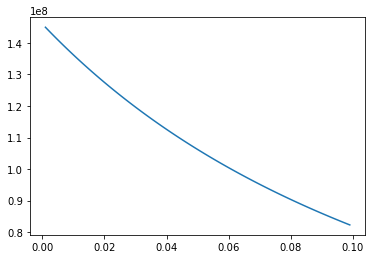

In [7]:
plt.plot(r,cf)
plt.show()

#### d.  Hold the discount rate fixed at $r = 5\%$ and vary $v$ from $0$ to $5$. Plot this graph.

In [8]:
N = 360
L0 = 100000000
r = 0.05
ite = 0.001
v = np.arange(0,5,ite)
i = 0.06

times = np.arange(0,N/12,1/12)
Z = np.exp(-r*times)

cf = np.zeros(len(v))
for k in range(len(v)):
    interest, paysched, paypre, CF = GetPrepayment(L0,i,N,v[k])
    cf[k] = np.inner(CF,Z)

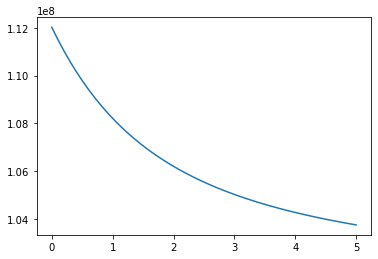

In [9]:
plt.plot(v,cf)
plt.show()

#### e.  It turns out, that when rates fall, pre-pays increase and when rates rise, pre-pays decrease.  Revisit your graph in c, but alter the prepayment speed $v$ to depend on $r$ via $v(r) = \frac{.12}{r+ .01}$.  What do you notice compared to the graphs in part c?  

In [10]:
N = 360
L0 = 100000000
ite = 0.001
r = np.arange(0.001,0.1,ite)
i = 0.06
times = np.arange(0,N/12,1/12)

cf = np.zeros(len(r))
for k in range(len(r)):
    v = 0.12/(r[k]+0.01)
    interest, paysched, paypre, CF = GetPrepayment(L0,i,N,v)
    Z = np.exp(-r[k]*times)
    cf[k] = np.inner(CF,Z)

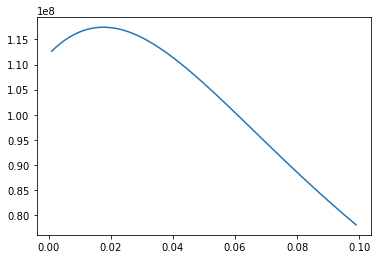

In [11]:
plt.plot(r,cf)
plt.show()

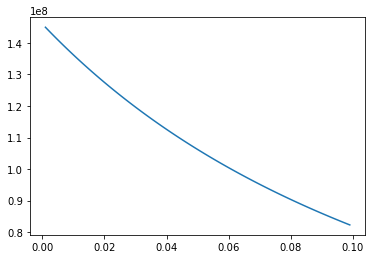

In [12]:
# plot part c
N = 360
L0 = 100000000
v = 2
ite = 0.001
r = np.arange(0.001,0.1,ite)
i = 0.06
interest, paysched, paypre, CF = GetPrepayment(L0,i,N,v)
times = np.arange(0,N/12,1/12)

cf = np.zeros(len(r))
for k in range(len(r)):
    Z = np.exp(-r[k]*times)
    cf[k] = np.inner(CF,Z)
plt.plot(r,cf)
plt.show()

We can find that in part c, the present value of the mortgage pool's cash flows decreases smoothly with the increasing risk-free rate. The whole curve is slightly concave downward. And in part e, the present value of the mortgage pool's cash flow increases first and then decreases. When the interest rate is 2%, the value of the cash flow achieves the maximum. The decreasing part of the curve is slightly convex upwards.

#### 2. In the lecture we discussed the the BSM model for stock prices $S(t)$ as:

$$du(t) = \mu dt + \sigma dX(t)$$ where
$$u(t) = \ln(S(t))$$ and
$X(t)$ is standard Brownian motion.


We then used $\mathrm{It\hat{o}'s}$ lemma to show that this is the same as

$$dS(t) = \left(\mu + \frac{1}{2}\sigma^2\right)S(t) dt + \sigma S(t) dX(t)$$

One could simulate this by discretizing and taking "small" time steps $\Delta t$ (e.g. $\Delta t = \frac{1}{252}$ for daily ).  For $u(t)$ we would then use


$$u(t_{k+1}) = u(t_k) + \mu \Delta t + \sigma \sqrt{\Delta t} \epsilon_k $$
where  
$$t_{k+1} = t_k + \Delta t$$ and the $\epsilon_k$ are IID 
$$\epsilon_k \sim N(0,1)$$ 

This creates a single "path" of outcomes. But we are actually interested in many possible paths.  So we would modify the above via:


$$u^j(t_{k+1}) = u^j(t_k) + \mu \Delta t + \sigma \sqrt{\Delta t} \epsilon_{j,k} $$

where $u^j$ is the value of $u(t)$ in the $jth$ path of the simulation.



In [13]:
#hint:  If we had N paths (indexed by j) and M time steps, we can generate a matrix of epsilons in python using numpy
import numpy as np
N = 5 # five paths
M = 10  # ten time steps

epsilons = np.random.standard_normal([N,M])
print(epsilons)

[[-4.45476977e-01 -7.31191490e-01  8.39443719e-01  1.27374373e+00
   2.43464781e-01  4.60221510e-01  2.38494096e+00  6.05645470e-01
  -1.13187362e+00  1.32161986e+00]
 [ 2.45717056e-02  1.13404717e+00  1.15160808e+00  1.53773500e+00
  -7.13809468e-04 -7.22298976e-01 -3.45700632e-02 -8.24719462e-01
   4.10895894e-01 -2.14774103e+00]
 [-1.00309494e+00 -2.38806621e-01  3.19922738e-01 -1.35449545e-01
  -1.58727957e+00  6.17813566e-01 -2.50186926e-01 -2.15365725e+00
   3.49019454e-01 -1.34603199e-01]
 [-1.52358084e+00  1.65574811e+00  1.04947317e+00  5.79626959e-01
  -2.94729910e-02 -3.71443081e-01 -1.36058359e-01 -4.60808981e-01
   2.01805039e+00 -5.06402045e-02]
 [ 2.15911951e-01  1.72393787e+00 -2.67589861e-01 -6.70379616e-01
  -1.23521240e+00 -2.92549564e-01 -1.74777490e-01  1.61536908e+00
   5.27080458e-01  2.31290041e-01]]


Once we have generated the paths for $u(t)$, we then have corresponding $S(t)$ paths via
$$S^j(t_k) = e^{u^j(t_k)}$$


We could then pick a time on the  $T = t_M$ and look at the distribution of $S^j(T)$ 

Alternatively, one could simulate via 

$$\hat{S}^j(t_{k +1}) = \hat{S}^j(t_k)\mathrm{Exp}\left((\mu + 0.5\sigma^2)\Delta t + \sigma \sqrt{\Delta t} \epsilon_{j,k}\right)$$ 


#### a. Let $\mu = .07$ and $\sigma = .2$.  Using daily time steps, simulate via both approaches and compare the distribtuion of  $S^j(T)$ with $\hat{S}^j(T)$ for $T = 1,10 \text{ and } 30$ years.


In [14]:
miu = .07
sig = .2
import seaborn as sns

def GetS1(N,M,delt,miu,sig):
    eps = np.random.standard_normal([N,M+1])
    u = np.ones([N,M+1])
    u[:,0] = np.log(1)
    for i in range(N):
        for j in range(M):
            u[i,j+1] = u[i,j]+miu*delt + sig*np.sqrt(delt)*eps[i,j]
    S1 = np.exp(u)
    return S1

def GetS2(N,M,delt,miu,sig):
    eps = np.random.standard_normal([N,M+1])
    S2 = np.ones([N,M+1])
    for i in range(N):
        for j in range(M):
            S2[i,j+1] = S2[i,j]*np.exp((miu+0.5*sig**2)*delt +sig*np.sqrt(delt)*eps[i,j])
    return S2

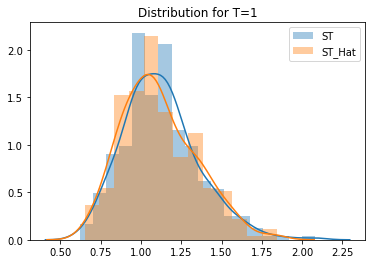

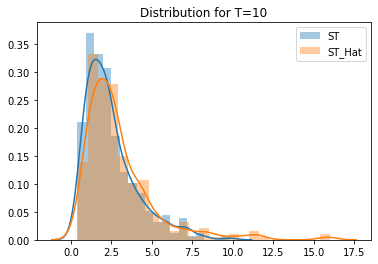

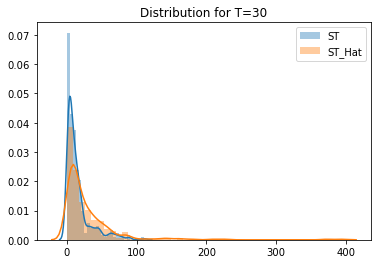

In [21]:
# T = 1 year
T = 1
N = 300 # path
M = 252*T # Daily path
delt = 1/252

# save the terminal column
S1 = GetS1(N,M,delt,miu,sig)
S2 = GetS2(N,M,delt,miu,sig)

import seaborn as sns
sns.distplot(S1[:,-1])
sns.distplot(S2[:,-1])
plt.legend(labels=['ST','ST_Hat'])
plt.title('Distribution for T=1')
plt.show()


# T = 10 year
T = 10
N = 300 # path
M = 252*T # Daily path
delt = 1/252

# save the terminal column
S1 = GetS1(N,M,delt,miu,sig)
S2 = GetS2(N,M,delt,miu,sig)
sns.distplot(S1[:,-1])
sns.distplot(S2[:,-1])
plt.legend(labels=['ST','ST_Hat'])
plt.title('Distribution for T=10')
plt.show()


# T = 30 year
T = 30
N = 300 # path
M = 252*T # Daily path
delt = 1/252

# save the terminal column
S1 = GetS1(N,M,delt,miu,sig)
S2 = GetS2(N,M,delt,miu,sig)
sns.distplot(S1[:,-1])
sns.distplot(S2[:,-1])
plt.legend(labels=['ST','ST_Hat'])
plt.title('Distribution for T=30')
plt.show()

#### b. Instead of using $\Delta t = \frac{1}{252}$, perform the above comparisons with monthly ($\Delta t = \frac{1}{12}$) and annual ($\Delta t = 1.0)$ time steps.   What happens?  What things do you conclude from this?

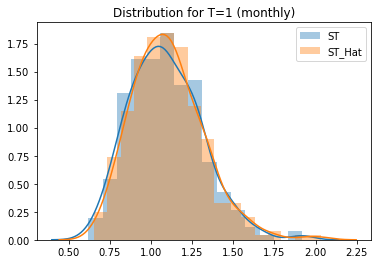

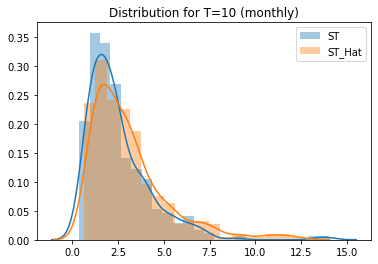

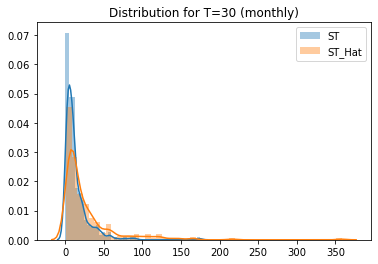

In [24]:
# monthly
# T = 1 year
T = 1
N = 300 # path
M = 12*T # Daily path
delt = 1/12

# save the terminal column
S1 = GetS1(N,M,delt,miu,sig)
S2 = GetS2(N,M,delt,miu,sig)
sns.distplot(S1[:,-1])
sns.distplot(S2[:,-1])
plt.legend(labels=['ST','ST_Hat'])
plt.title('Distribution for T=1 (monthly)')
plt.show()


# monthly
# T = 10 year
T = 10
N = 300 # path
M = 12*T # Daily path
delt = 1/12
# save the terminal column
S1 = GetS1(N,M,delt,miu,sig)
S2 = GetS2(N,M,delt,miu,sig)
sns.distplot(S1[:,-1])
sns.distplot(S2[:,-1])
plt.legend(labels=['ST','ST_Hat'])
plt.title('Distribution for T=10 (monthly)')
plt.show()


# monthly
# T = 30 year
T = 30
N = 300 # path
M = 12*T # Daily path
delt = 1/12
# save the terminal column
S1 = GetS1(N,M,delt,miu,sig)
S2 = GetS2(N,M,delt,miu,sig)
sns.distplot(S1[:,-1])
sns.distplot(S2[:,-1])
plt.legend(labels=['ST','ST_Hat'])
plt.title('Distribution for T=30 (monthly)')
plt.show()


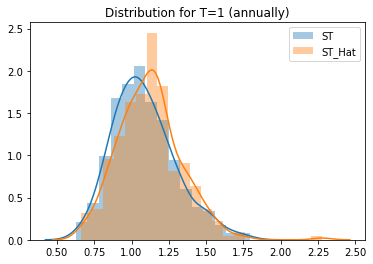

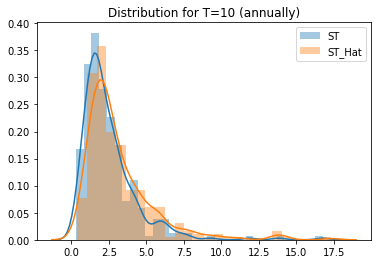

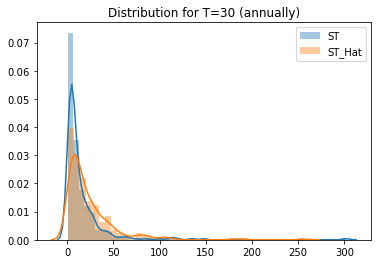

In [27]:
# annually
# T = 1 year
T = 1
N = 300 # path
M = T # Daily path
delt = 1

# save the terminal column
S1 = GetS1(N,M,delt,miu,sig)
S2 = GetS2(N,M,delt,miu,sig)
sns.distplot(S1[:,-1])
sns.distplot(S2[:,-1])
plt.legend(labels=['ST','ST_Hat'])
plt.title('Distribution for T=1 (annually)')
plt.show()


# annually
# T = 10 year
T = 10
N = 300 # path
M = T # Daily path
delt = 1
# save the terminal column
S1 = GetS1(N,M,delt,miu,sig)
S2 = GetS2(N,M,delt,miu,sig)
sns.distplot(S1[:,-1])
sns.distplot(S2[:,-1])
plt.legend(labels=['ST','ST_Hat'])
plt.title('Distribution for T=10 (annually)')
plt.show()


# annually
# T = 30 year
T = 30
N = 300 # path
M = T # Daily path
delt = 1
# save the terminal column
S1 = GetS1(N,M,delt,miu,sig)
S2 = GetS2(N,M,delt,miu,sig)
sns.distplot(S1[:,-1])
sns.distplot(S2[:,-1])
plt.legend(labels=['ST','ST_Hat'])
plt.title('Distribution for T=30 (annually)')
plt.show()

We can conclude that both of the approaches have similar trend. The distribution of $S^j(t_k)$  usually has larger kurtosis than the result of $\hat{S}^j(t_{k +1})$.


If we change the year T = 1,10,30, the distribution of the approaches gradually becomes right-skewed distribution. And the final result will increase the right-skewed degree with the increasing number of the years.